In [42]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve, auc

In [15]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [16]:
df.shape

(5728, 2)

In [17]:
df.columns

Index(['text', 'spam'], dtype='object')

In [18]:
# verify the duplicates and remove them
df.drop_duplicates(inplace=True)
print(df.shape)

(5695, 2)


In [19]:
#Number of missing data for each column
print(df.isnull().sum())

text    0
spam    0
dtype: int64


In [20]:
#download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
#Clean the Text
def process(text):
  nopunc= [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  return clean
#show the tokenization
df['text'].head().apply(process)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [22]:
#Convert the text into a matrix of token counts
message = CountVectorizer(analyzer=process).fit_transform(df['text'])

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(message, df['spam'], test_size=0.20)
#see the shape of the data
print(message.shape)

In [25]:
#create and train the Naive Bayes Classifier
classifier = MultinomialNB().fit(xtrain,ytrain)

In [26]:
#See the classifiers prediction and actual values on the dataset
print(classifier.predict(xtrain))
print(ytrain.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [28]:
#Evaluating the Model on the training data set
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))
print()
print("Confusion Matrix:\n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3452
           1       0.99      1.00      0.99      1104

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Confusion Matrix:
 [[3440   12]
 [   3 1101]]
Accuracy: 
 0.9967076382791923


In [30]:
#print the predictions
print(classifier.predict(xtest))
#print the actual values
print(ytest.values)

[0 0 0 ... 1 0 1]
[0 0 0 ... 1 0 0]


In [31]:
#Evaluate the model on the test data set
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print()
print("confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy:\n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       875
           1       0.96      1.00      0.98       264

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139


confusion Matrix: 
 [[864  11]
 [  0 264]]
Accuracy:
 0.990342405618964


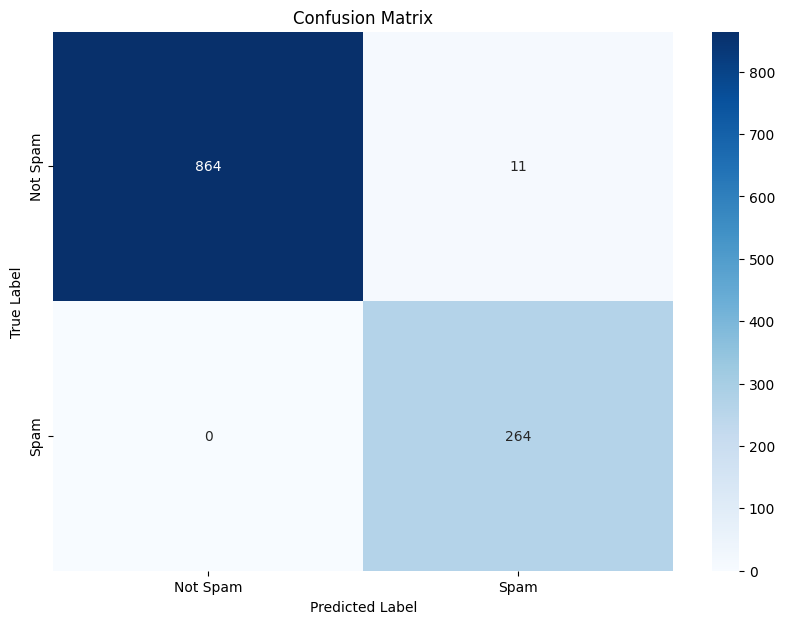

In [40]:
# Plot confusion matrix for test data
plt.figure(figsize=(10, 7))
conf_matrix = confusion_matrix(ytest, pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

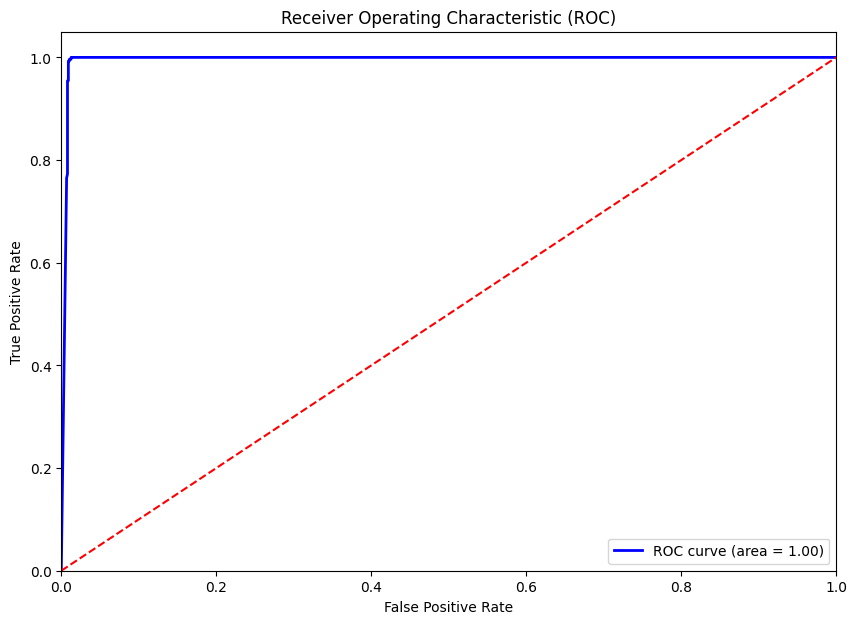

In [43]:
# Compute ROC Curve and AUC
y_prob = classifier.predict_proba(xtest)[:, 1]  # Get probability estimates for the positive class
fpr, tpr, _ = roc_curve(ytest, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()